# Introduction
blabla

### Importation des modules nécessaires
On charge les modules essentiels pour le fonctionnement du code

In [12]:
import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### Fonctions pour gérer matrices de coordonnées et distances
On implémente ici les fonctions auxiliaires pour aider le calcul est garder le code net. Les fonctions implémentés sont:
- Génératrice de villes,
- Calcul des distances entre points,
- Constructeur de matrice de distances.

In [13]:
# Générer matrice de coordonnées aléatoires
# Entrées: - n_cities : nombre de villes dans la réseau
#          - largeur : valeur maximale du coordonnées x
#          - hauteur : valeur maximale du coordonnées y
#          - seed : graine aléatoire
# Sorties: - matrix : matrice de coordonnées
def gen_villes(n_cities, largeur = 100, hauteur = 100, seed = 42):
    random.seed(seed)
    return [(random.uniform(0, largeur), random.uniform(0, hauteur)) for _ in range(n_cities)]


# Calculer la distance entre deux points
# Entrées: - p[1-2] : liste avec coordonnées du point 
# Sorties: - distance entre points
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


# Fonction pour construire matrice de distances
# Entrées: - villes : matrice de coordonnées
# Sorties: - matrice : matrice de distances
def constr_matrice_distances(villes):
    n = len(villes)                                 # Quantité de villes
    matrice = [[0.0] * n for _ in range(n)]         # Matrice carré initialisée à 0
    for i in range(n):
        for j in range(i + 1, n):
            d = distance(villes[i], villes[j])
            matrice[i][j] = d
            matrice[j][i] = d
    return matrice

### Fonctions pour dessiner les résultats
Ici on implémente les fonctions pour dessiner les graphs qui représentent les résultats. On implémente:
- Fonction pour dessiner les villes sur un réseau,
- Fonction pour implementer un graphe orienté avec le parcours.

In [14]:
# Fonction pour dessiner un graph
# Entrées: - coords : matrice de coordonnées des villes
#          - radius : taille du point dans le graph
#          - connected : décide si l'on ajoute les lignes
#          - embedded : décide si le graph est un image indépendant
#          - axis : axe à remplir si embedded est vrai
# Sorties: - l'image du graph
def plot_graph(coords, radius=10, connected=True, embedded=False, axis=None):
    # Si l'image est indépendant on cree la figure et ses axes
    if not embedded:
        fig, axis = plt.subplots()
    
    # On ajoute chaque ville au graph
    for i in range(len(coords)):
        circle = plt.Circle((coords[i][0], coords[i][1]), radius, color='blue', fill=True)
        axis.add_patch(circle)
    
        # Si connecté, on ajoute les lignes entre villes
        if connected:
            for j in range(i + 1, len(coords)):
                x_values = [coords[i][0], coords[j][0]]
                y_values = [coords[i][1], coords[j][1]]
                axis.plot(x_values, y_values, color='black', linestyle='-')
    
    # Si l'image est indépendant on choisit ses propriétés
    if not embedded:
        axis.set_aspect('equal', 'box')
        axis.autoscale()
        plt.grid(True)
        plt.show()


# Fonction pour dessiner un graph orienté
# Entrées: - coords : matrice de coordonnées des villes
#          - order : ordre de parcours des villes
#          - radius : taille du point dans le graph
#          - embedded : décide si le graph est un image indépendant
#          - axis : axe à remplir si embedded est vrai
# Sorties: - l'image du graph
def plot_directed_graph(coords, order, radius=10, embedded=False, axis=None):
    # Si l'image est indépendant on cree la figure et ses axes
    if not embedded:
        fig, axis = plt.subplots()
    
    # On ajoute chaque ville au graph. La première ville on ajoute en rouge
    for i in range(len(coords)):
        if i == order[0]:
            circle = plt.Circle((coords[i][0], coords[i][1]), radius, color='red', fill=True)
        else:
            circle = plt.Circle((coords[i][0], coords[i][1]), radius, color='blue', fill=True)
        axis.add_patch(circle)
    
    # Pour chaque ville, on ajoute une flèche connectant le parcours
    for j in range(len(order)-1):
        x_values = [coords[order[j]][0], coords[order[j+1]][0]]
        y_values = [coords[order[j]][1], coords[order[j+1]][1]]
        axis.annotate("", xytext=(coords[order[j]][0], coords[order[j]][1]), xy=(coords[order[j+1]][0], coords[order[j+1]][1]), arrowprops=dict(arrowstyle="->"))
    
    # Si l'image est indépendant on choisit ses propriétés
    if not embedded:
        axis.set_aspect('equal', 'box')
        axis.autoscale()
        plt.grid(True)
        plt.show()

# Algorithme Voisins plus proches
L'algorithme des voisins plus proches est un algorithme dit greedy, que vérifie pour toutes les villes quelle est la ville voisin plus proche que n'a été pas visitée. Avec ce schema, on obtient un parcours qui passe pour toutes les villes une fois, mais qui est pas forcement le plus optimale, parce que les résultats dépendent de la ville de départ.

## Implementation
nice algo

In [15]:
# Algorithme des voisins plus proches
# Entrées: - map objet de réseau de villes
def nearest_neighbors(distances, premiere = 0):
	n_cities = len(distances)
	visitee = [False for _ in range(n_cities)]
    # On cree une variable auxiliaire que vérifie si tous les villes ont été visitées
	tout_visite = False

	ville_actuelle = premiere
	visitee[ville_actuelle] = True

	distance_totale = 0
	ordre_visite = [premiere]
 
	# Si l'on a pas visité tous les villes, on continue
	while not tout_visite:
		# On choisit la ville actuelle
		meilleur_distance = float('inf')
		meilleur_voisin = None

		# On compare tous les voisins, chaque fois que la distance est inférieure, on
		# actualise le voisin
		for voisin in range(n_cities):
			if (voisin != ville_actuelle):
				distance = distances[ville_actuelle][voisin]
				if not visitee[voisin] and distance < meilleur_distance:
					meilleur_distance = distance
					meilleur_voisin = voisin

		# Après vérification de tous les voisins, on ajoute le voisin plus proche à
		# la liste et le marque comme visité. On met à jour l'indice actuel
		distance_totale += meilleur_distance
		ordre_visite.append(meilleur_voisin)
		visitee[meilleur_voisin] = True
		ville_actuelle = meilleur_voisin
		
		# Si tous les villes sont visitées, on marque la variable comme vrai pour sortir
		# le boucle
		if all(visitee):
			tout_visite = True
   
	# Pour finir, on ajoute la première ville a la fin de la liste, pour fermer le parcours
	distance_totale += distances[ville_actuelle][premiere]
	ordre_visite.append(premiere)

	return distance_totale, ordre_visite

## Exemples
Le premier exemple présenté est une réseau de 50 villes générés de façon aléatoire avec le grain 30. L'algorithme de voisins porches est utilisé trois fois dans le même réseau mais avec différents points de départ. On vérifie que le parcours dépend du point de départ choisi et cela peut affecter l'optimalité de l'algorithme.

La distance parcouru avec début à la ville 0 est 669.164125317683
La distance parcouru avec début à la ville 23 est 715.6268061036874
La distance parcouru avec début à la ville 42 est 692.4364105981019


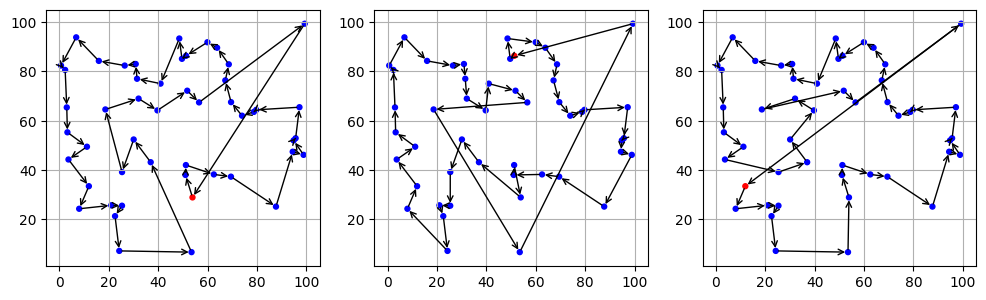

In [16]:
villes = gen_villes(50, seed=30)                                                    # Création du réseau
distances = constr_matrice_distances(villes)                                        # Matrice de distances
distance_totale_1, ordre_visite_1 = nearest_neighbors(distances, premiere=0)        # Premier appel
distance_totale_2, ordre_visite_2 = nearest_neighbors(distances, premiere=23)       # Deuxième appel
distance_totale_3, ordre_visite_3 = nearest_neighbors(distances, premiere=42)       # Troisième appel

print(f"La distance parcouru avec début à la ville 0 est {distance_totale_1}")
print(f"La distance parcouru avec début à la ville 23 est {distance_totale_2}")
print(f"La distance parcouru avec début à la ville 42 est {distance_totale_3}")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
plot_directed_graph(villes, ordre_visite_1, radius=1, embedded=True, axis=ax1)
plot_directed_graph(villes, ordre_visite_2, radius=1, embedded=True, axis=ax2)
plot_directed_graph(villes, ordre_visite_3, radius=1, embedded=True, axis=ax3)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax3.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
ax3.autoscale()

# Algorithme 2-opt
L'algorithme 2-opt est un algorithme de optimisation du parcours. Il prendre comme entrée un parcours déjà obtenu (dans ce cas, on utilise le parcours donnée par les voisins plus proches) et vérifie chaque sous-parcours en vérifient s'il est possible d'optimiser le chemin en échangent des villes.

## Implementation
nice algorithm

In [17]:
# Fonction auxiliaire pour calculer la distance parcouru
# Entrées: - matrice : matrice de distance
#          - ordre : ordre de visite
# Sorties: - distance : distance parcouru
def calculer_distance_totale(matrice, ordre):
    distance = 0
    
    for i in range(len(ordre) - 1):
        distance += matrice[ordre[i]][ordre[i+1]]
        
    return distance

# Algorithme 2-opt pour optimizer voisins proches
# Entrées: - map : objet de réseau de villes
def two_opt(distances, distance_totale, ordre_visite):
    # On considère l'état actuel comme la solution optimale
    mellieur_distance = distance_totale
    nouvel_ordre = ordre_visite[:-1]
    n = len(nouvel_ordre)
    amelioree = True

    # On cherche des séquences à optimiser
    while amelioree:
        amelioree = False
        
        # À partir de chaque noeud on prendre de chaînes
        for i in range(1, n - 1):
            # Pour chaque chaîne on fait le échange avec son inverse
            for j in range(i + 1, n):
                ordre_inverse = nouvel_ordre[:i] + nouvel_ordre[i:j+1][::-1] + nouvel_ordre[j+1:]
                nouvelle_distance = calculer_distance_totale(distances, ordre_inverse + [ordre_inverse[0]])

                # Si le chemin parcouru est moins avec le chemin inversé, on le mettre à jour
                if nouvelle_distance < mellieur_distance:
                    nouvel_ordre = ordre_inverse
                    mellieur_distance = nouvelle_distance
                    amelioree = True
                    break
                
            if amelioree:
                break

    # Mis a jour du réseau
    ordre_visite = nouvel_ordre + [nouvel_ordre[0]]
    distance_totale = mellieur_distance

    return distance_totale, ordre_visite

## Exemples
Le premier exemple 2-opt prendre les résultats de l'exemple du voisins proches. Avec départ à partir de la ville 0, on utilise l'algorithme 2-opt pour trouver des parcours plus efficients.

La distance parcouru avec les voisins proches est 669.164125317683
La distance parcouru avec 2-opt est 610.0907229936818


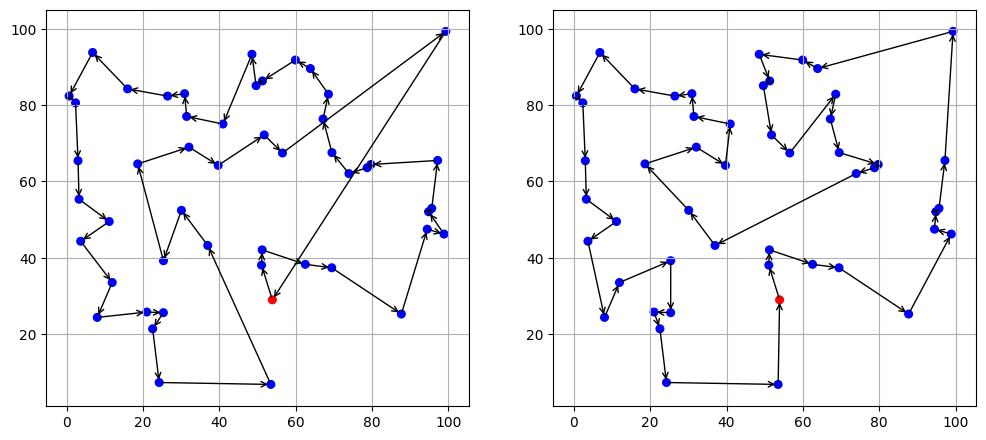

In [18]:
villes = gen_villes(50, seed=30)                                                                # Création du réseau
distances = constr_matrice_distances(villes)                                                    # Matrice de distances
distance_totale_nn, ordre_visite_nn = nearest_neighbors(distances, premiere=0)                  # Parcours NN
distance_totale_2o, ordre_visite_2o = two_opt(distances, distance_totale_nn, ordre_visite_nn)   # Parcours 2-opt

print(f"La distance parcouru avec les voisins proches est {distance_totale_nn}")
print(f"La distance parcouru avec 2-opt est {distance_totale_2o}")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
plot_directed_graph(villes, ordre_visite_nn, radius=1, embedded=True, axis=ax1)
plot_directed_graph(villes, ordre_visite_2o, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()

On fait le même avec les parcours voisin proches avec départ de la ville 23 et 42. On voit que le résultat de l'algorithme 2-opt dépend aussi du parcours donnée par l'algorithme d'origine, mais dans tous les cas on obtient un parcours qui a pas des croisements, ce qu'optimise le parcours.

La distance parcouru avec les voisins proches (départ 23) est 715.6268061036874
La distance parcouru avec 2-opt (départ 23) est 607.7181148123196


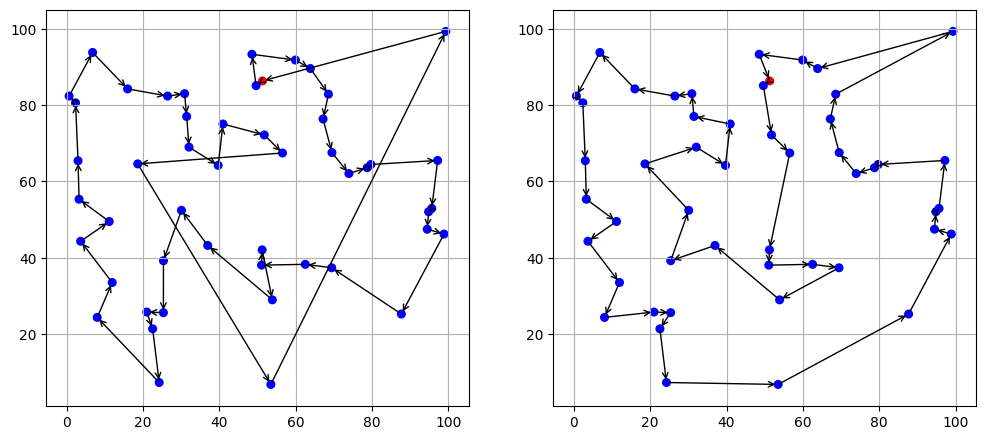

La distance parcouru avec les voisins proches (départ 42) est 692.4364105981019
La distance parcouru avec 2-opt (départ 42) est 609.9057237623452


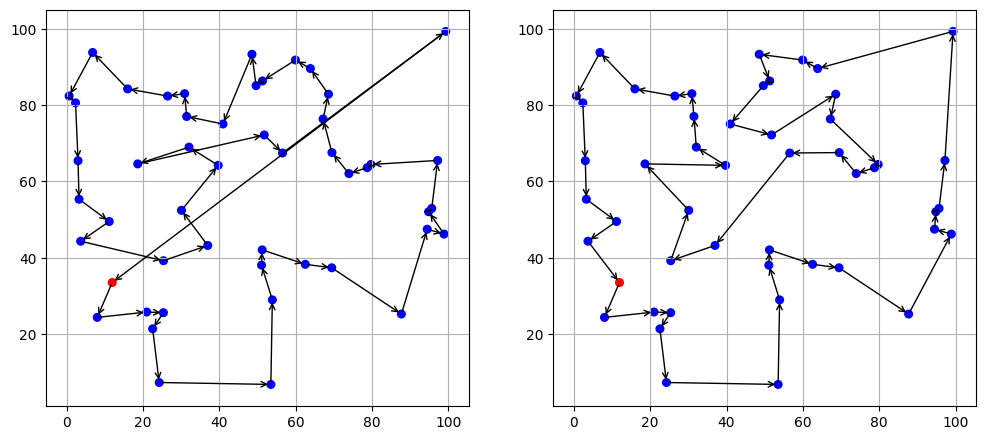

In [19]:
villes = gen_villes(50, seed=30)                                                                            # Création du réseau
distances = constr_matrice_distances(villes)                                                                # Matrice de distances
distance_totale_nn_23, ordre_visite_nn_23 = nearest_neighbors(distances, premiere=23)                       # Parcours NN
distance_totale_nn_42, ordre_visite_nn_42 = nearest_neighbors(distances, premiere=42)                       # Parcours NN
distance_totale_2o_23, ordre_visite_2o_23 = two_opt(distances, distance_totale_nn_23, ordre_visite_nn_23)   # Parcours 2-opt
distance_totale_2o_42, ordre_visite_2o_42 = two_opt(distances, distance_totale_nn_42, ordre_visite_nn_42)   # Parcours 2-opt

print(f"La distance parcouru avec les voisins proches (départ 23) est {distance_totale_nn_23}")
print(f"La distance parcouru avec 2-opt (départ 23) est {distance_totale_2o_23}")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
plot_directed_graph(villes, ordre_visite_nn_23, radius=1, embedded=True, axis=ax1)
plot_directed_graph(villes, ordre_visite_2o_23, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
plt.show()

print(f"La distance parcouru avec les voisins proches (départ 42) est {distance_totale_nn_42}")
print(f"La distance parcouru avec 2-opt (départ 42) est {distance_totale_2o_42}")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
plot_directed_graph(villes, ordre_visite_nn_42, radius=1, embedded=True, axis=ax1)
plot_directed_graph(villes, ordre_visite_2o_42, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()

# Insertion heuristique
blabla

## Implementation

## Exemples
some

# Recuit simulé
blabla

## Implementation

## Exemples
some

# Comparaison entre algorithmes
Voici une comparaison entre les différents algorithmes utilisés. On compare les résultats obtenus, le temps qui prendre chaque calcul et la complexité temporelle de chaque algorithme

### Distance optimale

In [ ]:
villes_10 = gen_villes(10, seed=23534)
villes_50 = gen_villes(50, seed=23534)
villes_100 = gen_villes(100, seed=23534)
# villes_500 = gen_villes(500, seed=23534)
# villes_1000 = gen_villes(1000, seed=23534)
distances_10 = constr_matrice_distances(villes_10)
distances_50 = constr_matrice_distances(villes_50)
distances_100 = constr_matrice_distances(villes_100)
# distances_500 = constr_matrice_distances(villes_500)
# distances_1000 = constr_matrice_distances(villes_1000)

d_tot_nn_10, ord_nn_10 = nearest_neighbors(distances_10, premiere=0)
d_tot_nn_50, ord_nn_50 = nearest_neighbors(distances_50, premiere=0)
d_tot_nn_100, ord_nn_100 = nearest_neighbors(distances_100, premiere=0)
# d_tot_nn_500, ord_nn_500 = nearest_neighbors(distances_500, premiere=0)
# d_tot_nn_1000, ord_nn_1000 = nearest_neighbors(distances_1000, premiere=0)
d_tot_2o_10, ord_2o_10 = two_opt(distances_10, d_tot_nn_10, ord_nn_10)
d_tot_2o_50, ord_2o_50 = two_opt(distances_50, d_tot_nn_50, ord_nn_50)
d_tot_2o_100, ord_2o_100 = two_opt(distances_100, d_tot_nn_100, ord_nn_100)
# d_tot_2o_500, ord_2o_500 = two_opt(distances_500, d_tot_nn_500, ord_nn_500)
# d_tot_2o_1000, ord_2o_1000 = two_opt(distances_1000, d_tot_nn_1000, ord_nn_1000)

print('N villes \t Voisins proches \t 2-opt \t\t\t Insertion Heuristique \t Recuit simulé')
print(f'10  \t\t {d_tot_nn_10}  \t {d_tot_2o_10}  \t  \t ')
print(f'50  \t\t {d_tot_nn_50}  \t {d_tot_2o_50}  \t  \t ')
print(f'100 \t\t {d_tot_nn_100} \t {d_tot_2o_100} \t  \t ')
# print(f'500 & {d_tot_nn_500} &  &  & ')
# print(f'1000 & {d_tot_nn_1000} &  &  & ')


N villes 	 Voisins proches 	 2-opt 			 Insertion Heuristique 	 Simulated Annealing
10  		 360.22834314520327  	 276.45564777331816  	 276.45564777331816 	 276.45564777331816
50  		 764.8463187570351  	 612.9002614085535  	  	 
100 		 1011.0374788410568 	 820.0688906045029 	  	 


### Complexité temporelle

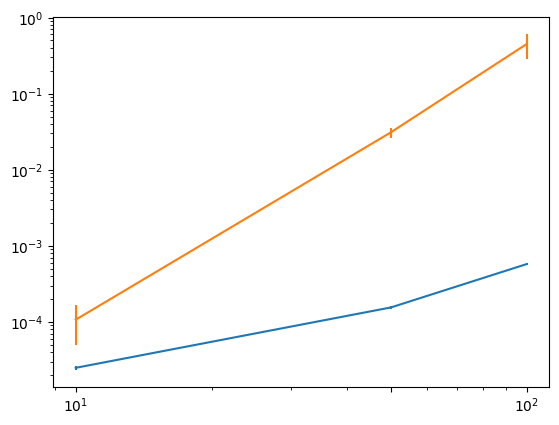

In [45]:
temps_10_nn = []
temps_50_nn = []
temps_100_nn = []
temps_500_nn = []
temps_1000_nn = []

temps_10_2o = []
temps_50_2o = []
temps_100_2o = []
temps_500_2o = []
temps_1000_2o = []

# temps_10_ih = []
# temps_50_ih = []
# temps_100_ih = []
# temps_500_ih = []
# temps_1000_ih = []

# temps_10_sa = []
# temps_50_sa = []
# temps_100_sa = []
# temps_500_sa = []
# temps_1000_sa = []

n_iters = 5

for i in range(n_iters):
    villes_10 = gen_villes(10, seed=random.randint(0,23000))
    villes_50 = gen_villes(50, seed=random.randint(0,23000))
    villes_100 = gen_villes(100, seed=random.randint(0,23000))
    villes_500 = gen_villes(500, seed=random.randint(0,23000))
    villes_1000 = gen_villes(1000, seed=random.randint(0,23000))
    distances_10 = constr_matrice_distances(villes_10)
    distances_50 = constr_matrice_distances(villes_50)
    distances_100 = constr_matrice_distances(villes_100)
    distances_500 = constr_matrice_distances(villes_500)
    distances_1000 = constr_matrice_distances(villes_1000)

    t_i = time.time()
    d_tot_nn_10, ord_nn_10 = nearest_neighbors(distances_10, premiere=0)
    t_f = time.time()
    temps_10_nn.append(t_f - t_i)

    t_i = time.time()
    d_tot_nn_50, ord_nn_50 = nearest_neighbors(distances_50, premiere=0)
    t_f = time.time()
    temps_50_nn.append(t_f - t_i)

    t_i = time.time()
    d_tot_nn_100, ord_nn_100 = nearest_neighbors(distances_100, premiere=0)
    t_f = time.time()
    temps_100_nn.append(t_f - t_i)

    # t_i = time.time()
    # d_tot_nn_500, ord_nn_500 = nearest_neighbors(distances_500, premiere=0)
    # t_f = time.time()
    # temps_500_nn.append(t_f - t_i)

    # t_i = time.time()
    # d_tot_nn_1000, ord_nn_1000 = nearest_neighbors(distances_1000, premiere=0)
    # t_f = time.time()
    # temps_1000_nn.append(t_f - t_i)

    t_i = time.time()
    d_tot_2o_10, ord_2o_10 = two_opt(distances_10, d_tot_nn_10, ord_nn_10)
    t_f = time.time()
    temps_10_2o.append(t_f - t_i)

    t_i = time.time()
    d_tot_2o_50, ord_2o_50 = two_opt(distances_50, d_tot_nn_50, ord_nn_50)
    t_f = time.time()
    temps_50_2o.append(t_f - t_i)

    t_i = time.time()
    d_tot_2o_100, ord_2o_100 = two_opt(distances_100, d_tot_nn_100, ord_nn_100)
    t_f = time.time()
    temps_100_2o.append(t_f - t_i)

    # t_i = time.time()
    # d_tot_2o_500, ord_2o_500 = two_opt(distances_500, d_tot_nn_500, ord_nn_500)
    # t_f = time.time()
    # temps_500_2o.append(t_f - t_i)

    # t_i = time.time()
    # d_tot_2o_100, ord_2o_100 = two_opt(distances_1000, d_tot_nn_1000, ord_nn_1000)
    # t_f = time.time()
    # temps_1000_2o.append(t_f - t_i)

mean_10_nn = np.mean(temps_10_nn)
mean_50_nn = np.mean(temps_50_nn)
mean_100_nn = np.mean(temps_100_nn)
# mean_500_nn = np.mean(temps_500_nn)
# mean_100_nn = np.mean(temps_1000_nn)
std_10_nn = np.std(temps_10_nn)
std_50_nn = np.std(temps_50_nn)
std_100_nn = np.std(temps_100_nn)
# std_500_nn = np.std(temps_500_nn)
# std_1000_nn = np.std(temps_1000_nn)

mean_10_2o = np.mean(temps_10_2o)
mean_50_2o = np.mean(temps_50_2o)
mean_100_2o = np.mean(temps_100_2o)
# mean_500_2o = np.mean(temps_500_2o)
# mean_1000_2o = np.mean(temps_1000_2o)
std_10_2o = np.std(temps_10_2o)
std_50_2o = np.std(temps_50_2o)
std_100_2o = np.std(temps_100_2o)
# std_500_2o = np.std(temps_500_2o)
# std_1000_2o = np.std(temps_1000_2o)

x_villes = [10,50,100]
mean_nn = [mean_10_nn, mean_50_nn, mean_100_nn]
std_nn = [std_10_nn, std_50_nn, std_100_nn]
mean_2o = [mean_10_2o, mean_50_2o, mean_100_2o]
std_2o = [std_10_2o, std_50_2o, std_100_2o]
# mean_ih = [mean_10_ih, mean_50_ih, mean_100_ih]
# std_ih = [std_10_ih, std_50_ih, std_100_ih]
# mean_sa = [mean_10_sa, mean_50_sa, mean_100_sa]
# std_sa = [std_10_sa, std_50_sa, std_100_sa]

fig, ax = plt.subplots()
ax.errorbar(x_villes, mean_nn, std_nn,label= 'Voisin plus proches')
ax.errorbar(x_villes, mean_2o, std_2o,label= '2-opt')
# ax.errorbar(x_villes, mean_ih, std_ih,label= 'Insertion heuristique')
# ax.errorbar(x_villes, mean_sa, std_sa,label= 'Recuit simulé')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks(x_villes)
plt.show()

    